# Lab Assignment 3: Empirical Model Fitting

This lab assignment has two parts ...

#### Part 1. Step Testing

This you will need to do with the Temperature Control Lab device. Perform two experiments to gather data needed to fit empirical models to the process dynamics. Be sure to save your data to files before leaving the lab.

#### Part 2. Model Fitting

This can be done outside of the lab. Using the data you collected, you will fit three commonly used models for process dynamics:

* First Order
* First Order with Deadtime
* Overdamped Second Order

## Part 1. Step Testing

With your TCLab device at ambient conditions, perform two step tests in which heater one is set to 40% and 60% of full power conditions. Save all data to files for later analysis. 

The following cells provide you with some starter code. You'll need to adapt this starter code to perform the needed experiments.

Hints:

1. You'll want at least 800 seconds of data.
2. Be sure to wait at least 10 minutes between experiments for the device to return to ambient temperature.  You can check temperature with a.T1

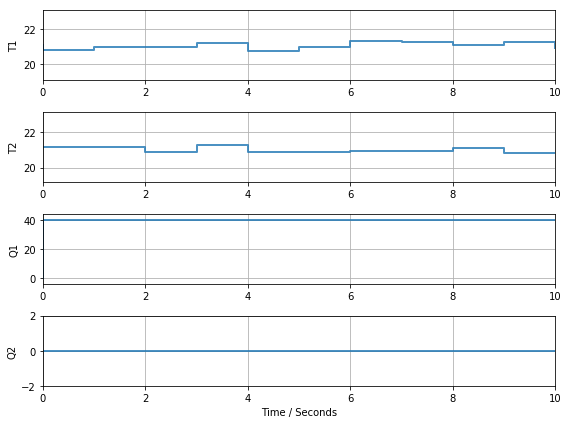

TCLab Model disconnected successfully.


In [11]:
# Sample code for step test. Adjust tfinal and a.U1 as needed

from tclab import TCLab, Historian, Plotter, clock

tfinal = 10

with TCLab() as a:
    h = Historian(a.sources)
    p = Plotter(h,tfinal)
    a.U1 = 40
    for t in clock(tfinal):
        p.update(t)

### Saving and Loading Data

In [26]:
# functions to save and load data to a file with name fname

def save_history(h, fname):
    "Save historian log to a file."
    import pandas as pd
    df = pd.DataFrame.from_records(h.log, columns=h.columns, index='Time')
    df.to_csv(fname)
    
def load_history(fname):
    "Return historian data from a file."
    import pandas as pd
    return pd.read_csv(fname)

In [27]:
# example of saving data

save_history(h, 'Step_test.csv')

In [28]:
# example of loading data from a file

df = load_history('Step_test.csv')
t = df['Time'].values
T1 = df['T1'].values

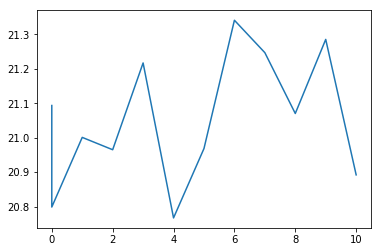

In [29]:
% matplotlib inline
import matplotlib.pyplot as plt

plt.plot(t,T1)

### Step Test at 40% power

In the cell(s) below, add code to perform a step test for 800 seconds at 40% of full power. Save the data to a file for later analysis.

### Step Test at 60% power

In the cell(s) below, add code to perform a step test for 800 seconds at 60% of full power. Save the data to a file for later analysis. (Be sure not to overwrite previously save files.)

## Part 2. Fitting Empirical Models

For this lab assignment you are to fit three different empirical models to the data gathered in the laboratory. Empirical models are generic descriptions of process dynamics that can be applied to systems for the purpose simulating process behavior. 

### 2.a First Order

A generic linear first-order system can be described by the differential equation

$$\tau \frac{dy}{dt} + y = K u$$

where $\tau$ is a time constant and $K$ is the steady state time constant. Variable $y$ is the deviation of the process varaible from an initial reference steady-state when $u=0$.

As discussed in section 5.2.1 of your textbook, for a step input of magnitude $M$ the response of this system is given by

$$y(t) = K M (1-e^{-t/\tau})$$

In the cells below, plot both step responses experimental data. Use Figure 5.3 and the data in Table 5.1, estimate values for $K$ and $\tau$. Plot the model response. Refine the values of $K$ and $\tau$ until you find a choice of values that best describes the data.

### 2.b First Order with Dead-time

A commonly used model in the process industries is first-order with dead-time. The dead-time is a parameter $\theta$ that represents a delay between when an action takes place and the process response. 

$$y(t) = \begin{cases}0 & t \lt \theta \\  K M (1-e^{-(t-\theta)/\tau}) &  t \geq \theta\end{cases}$$

Repeat the procedure above, but this time including three parameters $K$, $\tau$ and $\theta$.  Does this model to a better job of describing the step response?

Note: Evaluating this function is a little tricky. The cell below demonstrates how to do this in a few lines of code.

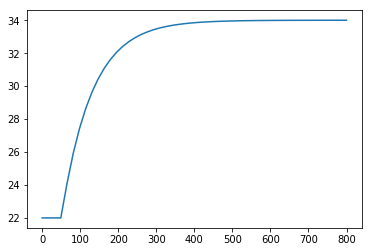

In [46]:
# demonstration of how to compute a response with time delay

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

K = 30                               # gain
tau = 80                             # time constant
theta = 50                           # time delay
T_ambient = 22                       # ambient temperature
M = 0.4                              # step input

t = np.linspace(0,800)               # time grid

y = K*M*(1-np.exp(-(t-theta)/tau))   # model response
y[t <= theta] = 0                    # response is zero if t <= theta
plt.plot(t, y + T_ambient)           # plot

### 2.c Second Order

A generic model for an over-damped second-order process is given by equation 5-47 of your textbook. The model is written  

$$y(t) = K M (1 - \frac{\tau_1e^{-t/\tau_1} - \tau_2e^{-t/\tau_2}}{\tau_1 - \tau_2})$$

Repeat the procedure above, but this time including three parameters $K$, $\tau_1$ and $\tau_2$.  Does this model to a better job of describing the step response?